In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
pwd

'C:\\Users\\RahulA\\iNeuron\\Datasets_collections\\Machine_Learning'

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/subhadipml/California-Housing-Price-Prediction/master/housing.csv")

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [13]:
import copy
housing = copy.deepcopy(df)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [14]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
housing[housing["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


In [17]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

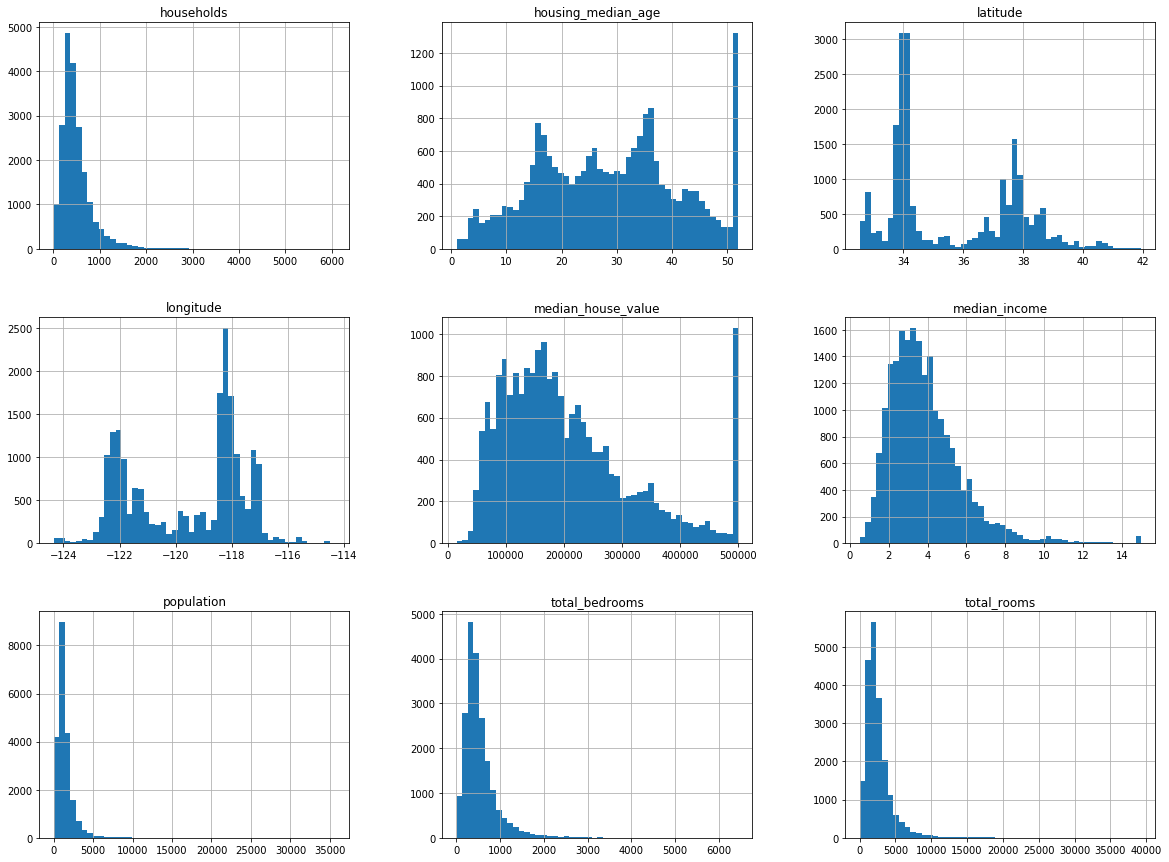

In [20]:
housing.hist(bins=50, figsize=(20,15));


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [23]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,NEAR OCEAN,103000
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,NEAR OCEAN,382100
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,NEAR OCEAN,172600
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,NEAR OCEAN,93400
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,INLAND,96500
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35,1330,201.0,658,217,6.3700,<1H OCEAN,229200
11964,-117.43,34.02,33,3084,570.0,1753,449,3.0500,INLAND,97800
5390,-118.38,34.03,36,2101,569.0,1756,527,2.9344,<1H OCEAN,222100
860,-121.96,37.58,15,3575,597.0,1777,559,5.7192,<1H OCEAN,283500


In [24]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20046,-119.01,36.06,25,1505,NaN,1392,359,1.6812,INLAND,47700
3024,-119.46,35.14,30,2943,NaN,1565,584,2.5313,INLAND,45800
15663,-122.44,37.80,52,3830,NaN,1310,963,3.4801,NEAR BAY,500001
20484,-118.72,34.28,17,3051,NaN,1705,495,5.7376,<1H OCEAN,218600
9814,-121.93,36.62,34,2351,NaN,1063,428,3.7250,NEAR OCEAN,278000
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16,3165,482.0,1351,452,4.6050,<1H OCEAN,263300
16623,-120.83,35.36,28,4323,886.0,1650,705,2.7266,NEAR OCEAN,266800
18086,-122.05,37.31,25,4111,538.0,1585,568,9.2298,<1H OCEAN,500001
2144,-119.76,36.77,36,2507,466.0,1227,474,2.7850,INLAND,72300


In [25]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

In [26]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100,2
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100,2
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300,2
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700,2


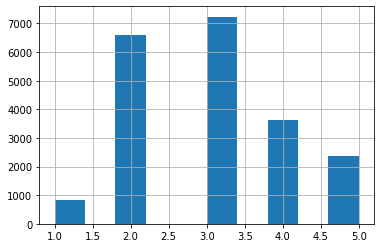

In [27]:
housing['income_cat'].hist()

In [28]:
housing['income_cat'].value_counts()/len(housing['income_cat'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_train_set["income_cat"].value_counts()/len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_cat, dtype: float64

In [32]:
train_set.shape

(16512, 10)

In [33]:
test_set.shape

(4128, 10)

In [34]:
housing = strat_train_set.copy()

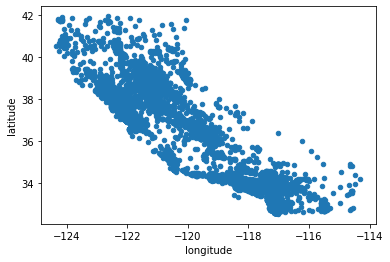

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")

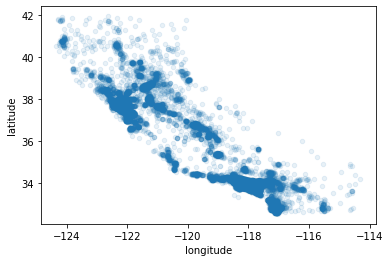

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

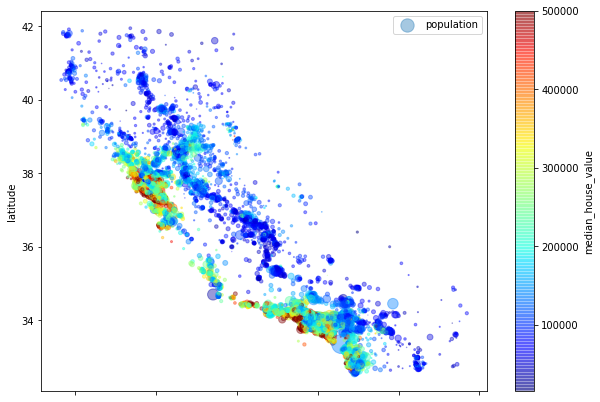

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [40]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [41]:
from pandas.plotting import scatter_matrix

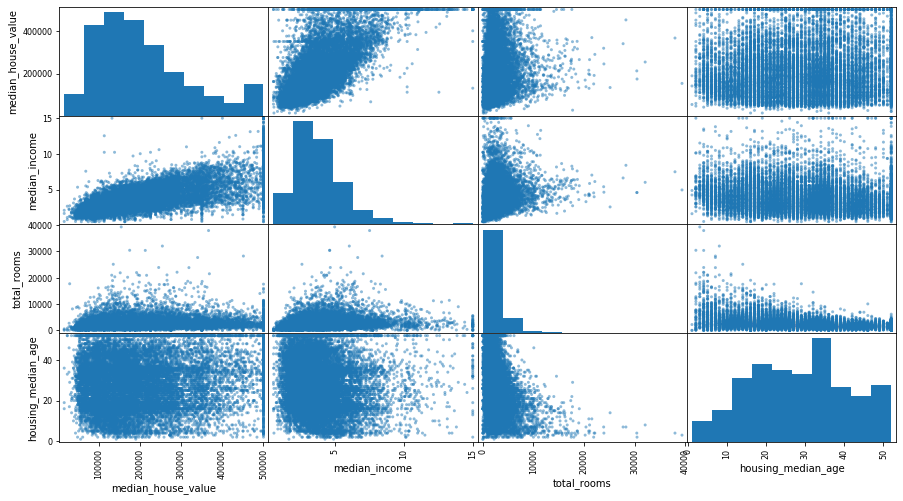

In [42]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,8));

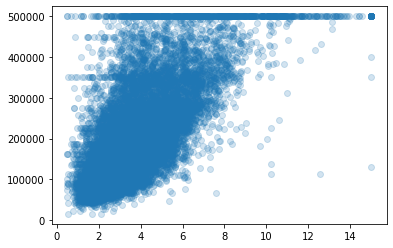

In [43]:
plt.scatter(data=housing, x="median_income", y="median_house_value",alpha=0.2);

In [44]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [46]:
corr_matrix = housing.corr()

In [47]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [48]:
## missing values fill:
median = housing["total_bedrooms"].median()
median

433.0

In [49]:
housing["total_bedrooms"].fillna(median, inplace=True)

In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  int64   
 3   total_rooms         16512 non-null  int64   
 4   total_bedrooms      16512 non-null  float64 
 5   population          16512 non-null  int64   
 6   households          16512 non-null  int64   
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [51]:
##Converting text to numerical value:

housing_cat = housing[["ocean_proximity"]]
#housing_cat.head(10)

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) 
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [57]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [58]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
##Custom Transforms

from sklearn.base import BaseEstimator, TransformerMixin

In [60]:
rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_ix] / x[:, households_ix]
        population_per_household = x[:, population_ix] / x[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
        
   
    

In [61]:
pwd

'C:\\Users\\RahulA\\iNeuron\\Datasets_collections\\Machine_Learning'

In [65]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [66]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [67]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [68]:
x = imputer.transform(housing_num)

In [69]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [71]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ("attribs_adder", CombinedAttributesAdder()),
                        ("std_scaler", StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [72]:
from sklearn.compose import ColumnTransformer

In [73]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]
Labels: [286600, 340600, 196900, 46300, 254500]


In [77]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,2
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,3


In [78]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.95445595, -0.31205452,
        -0.08649871,  0.15531753,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.89030518,  0.21768338,
        -0.03353391, -0.83628902,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.95445595, -0.46531516,
        -0.09240499,  0.4222004 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.95445595, -0.07966124,
         0.08973561, -0.19645314,  0.        ,  1.        ,  0.        ,
         0.        

In [79]:
from sklearn.metrics import mean_squared_error
some_predictions = lin_reg.predict(some_data_prepared)

In [80]:
np.sqrt(mean_squared_error(some_labels,some_predictions))

46731.70913214734

In [81]:
some_data['actual'] = some_labels
some_data['prediction'] = some_predictions

C:\Users\RahulA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RahulA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,actual,prediction
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,<1H OCEAN,2,286600,203682.373795
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,<1H OCEAN,5,340600,326371.393708
14650,-117.20,32.77,31,1952,471.0,936,462,2.8621,NEAR OCEAN,2,196900,204218.645882
3230,-119.61,36.31,25,1847,371.0,1460,353,1.8839,INLAND,2,46300,58685.477048
3555,-118.59,34.23,17,6592,1525.0,4459,1463,3.0347,<1H OCEAN,3,254500,194213.064430


In [83]:
test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [86]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [87]:
housing_labels.shape

(16512,)

In [88]:
tree_reg.score(housing_prepared, housing_labels)

1.0

In [89]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))
np.sqrt(mean_squared_error(some_labels,some_predictions))

Predictions: [286600. 340600. 196900.  46300. 254500.]
Labels: [286600, 340600, 196900, 46300, 254500]


46731.70913214734

In [90]:
## Cross Validation:-

from sklearn.model_selection import cross_val_score

In [91]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [92]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [93]:
display_scores(tree_rmse_scores)

Scores: [69001.04929135 68158.7075255  71609.21337888 67812.34936309
 71612.79047055 75441.05363874 70355.23967269 70831.2492234
 76263.41920807 69528.37158428]
Mean: 71061.34433565444
Standard Deviation: 2701.394220605603


In [94]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_scores)

In [95]:
display_scores(lin_reg_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449331
Standard Deviation: 2662.761570610344


In [96]:
## Randomforestregressor:-

from sklearn.ensemble import RandomForestRegressor

In [97]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housing_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

18690.25113884946

In [99]:
## Now cross validation:-

forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                   scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(forest_reg_scores)

display_scores(-forest_reg_rmse_scores)

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard Deviation: nan


C:\Users\RahulA\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
